In [145]:
import csv
import numpy as np
from typing import Set,Tuple, List
import torch
import torch.utils
import torch.utils.data
import torch.nn as nn
import torchvision
NoneType = type(None)
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from PIL import Image
import torchvision.transforms.functional as TF
from torchvision.models import vgg11
from torchvision.models import mobilenet_v2
import torchvision.transforms as transforms
import time

In [146]:
def plot_data(csv_file_path: str):
    """
    This code plots the precision-recall curve based on data from a .csv file,
    where precision is on the x-axis and recall is on the y-axis.
    It it not so important right now what precision and recall means.
    
    Precision is the proportion of TP to all the instances of positive predictions (TP+FP).
    Recall is the proportion of TP from all the positive instances (TP+FN).

    :param csv_file_path: The CSV file containing the data to plot.


    **This method is part of a series of debugging exercises.**
    **Each Python method of this series contains bug that needs to be found.**

    | ``1   For some reason the plot is not showing correctly, can you find out what is going wrong?``
    | ``2   How could this be fixed?``

    This example demonstrates the issue.
    It first generates some data in a csv file format and the plots it using the ``plot_data`` method.
    If you manually check the coordinates and then check the plot, they do not correspond.

    >>> f = open("data_file.csv", "w")
    >>> w = csv.writer(f)
    >>> _ = w.writerow(["precision", "recall"])
    >>> w.writerows([[0.013,0.951],
    ...              [0.376,0.851],
    ...              [0.441,0.839],
    ...              [0.570,0.758],
    ...              [0.635,0.674],
    ...              [0.721,0.604],
    ...              [0.837,0.531],
    ...              [0.860,0.453],
    ...              [0.962,0.348],
    ...              [0.982,0.273],
    ...              [1.0,0.0]])
    >>> f.close()
    >>> plot_data('data_file.csv')
    
    
     Macro F1 score: for inblanaced sets
    """
    # load data
  
    results = []
    with open(csv_file_path) as result_csv:
        csv_reader = csv.reader(result_csv, delimiter=',')
        next(csv_reader)
        for row in csv_reader:
            results.append(row)
        results = np.stack(results).astype(float)
        
    print(results.dtype)

    """
    # Initialize an empty array to store coordinates
    results = np.empty((0, 2), float)

    # Read the CSV file using csv.reader within a for loop
    with open('data_file.csv', 'r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
        # Convert each row to float and stack them into the array
            results = np.vstack([results, np.array(row).replace(',','.', regex=True).astype(float)])

    # plot precision-recall curve
    
    x_values = results[:, 1]
    y_values = results[:, 0]

    # Plotting the line graph
    plt.plot(x_values, y_values, marker='o', linestyle='-')
   
    # Adding labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Line Graph of Coordinates')

    # Displaying the plot
    plt.grid(True)  # Add grid
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()
  
    """
    plt.plot(results[:, 1], results[:, 0],  marker='o', linestyle='-')
   
    x_axes = results[:, 1]
    y_axes = results[:, 0]

    
    plt.ylim([-0.05, 1.05])
    plt.xlim([-0.05, 1.05])
   
   
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)  # Add grid
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()
  

float64


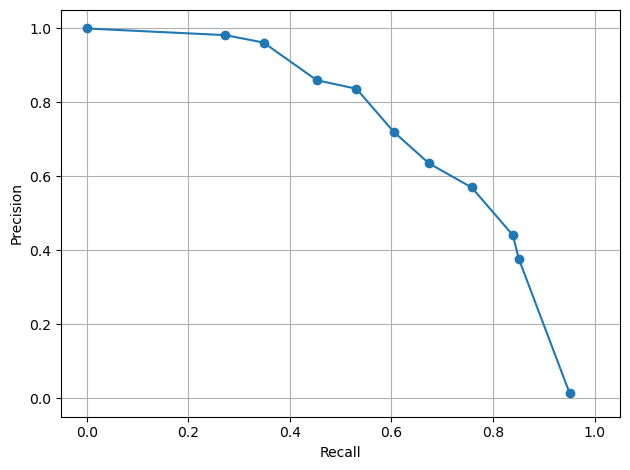

In [147]:
f = open("data_file.csv", "w")
w = csv.writer(f)
_ = w.writerow(["precision", "recall"])
w.writerows([[0.013,0.951],
             [0.376,0.851],
             [0.441,0.839],
             [0.570,0.758],
             [0.635,0.674],
             [0.721,0.604],
             [0.837,0.531],
             [0.860,0.453],
             [0.962,0.348],
             [0.982,0.273],
             [1.0,0.0]])
f.close()
plot_data('data_file.csv')
